In [2]:
import tensorflow.keras as keras
import numpy as np
import os

from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
from keras.layers import Input, Concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [3]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [4]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


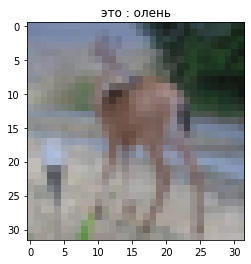

In [5]:
N = 100

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [6]:
data_augmentation = True

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 63s 34ms/step - loss: 2.1032 - accuracy: 0.2179 - val_loss: 1.9146 - val_accuracy: 0.3136
сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 2s 6ms/step - loss: 1.9146 - accuracy: 0.3136
Test loss: 1.9146288633346558
Test accuracy: 0.31360000371932983


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

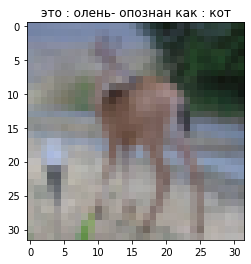

In [9]:
N = 100
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [10]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True

In [11]:
# Препроцессинг и data augmentation в реальном времени:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=5, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

Попробуем построить модель, которая будет объединением двух нитей со сверточными слоями.

In [12]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
second_dense = x22

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense = Dense(512, activation='relu')(merge_flat)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_2stek = Model(inputs=first_input, outputs=merge_class)
# sgd_grad = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_2stek.compile(optimizer='SGD', 
                   loss=keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

In [13]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
  second_dense = x22

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])

Прогон 0:
1563/1563 [==============================] - 74s 47ms/step - loss: 1.7483 - accuracy: 0.3723 - val_loss: 1.4188 - val_accuracy: 0.4890
Прогон 1:
1563/1563 [==============================] - 73s 47ms/step - loss: 1.7577 - accuracy: 0.3704 - val_loss: 1.4721 - val_accuracy: 0.4721
Прогон 2:
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7736 - accuracy: 0.3629 - val_loss: 1.4637 - val_accuracy: 0.4775
Прогон 3:
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7514 - accuracy: 0.3719 - val_loss: 1.4478 - val_accuracy: 0.4782
Прогон 4:
1563/1563 [==============================] - 73s 46ms/step - loss: 1.7994 - accuracy: 0.3566 - val_loss: 1.5162 - val_accuracy: 0.4676


In [14]:
print(f'Метрика двухнитевой модели на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Метрика двухнитевой модели на тесте - 0.4769 +- 0.0072


Видно, что метрика модели улучшилась. Попробуем теперь добавить дополнительную нить и посмотреть каким образом это повлияет на результаты:

In [15]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
second_dense = x22

merge_one = Concatenate(axis =-1)([first_dense, second_dense])

x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


merge_two = Concatenate(axis = -1)([merge_one, x32])

merge = Flatten()(merge_two)
merge_dense = Dense(512, activation='relu')(merge)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_3stek = Model(inputs=first_input, outputs=merge_class)
model_3stek.compile(optimizer='SGD', 
                   loss=keras.losses.CategoricalCrossentropy(), 
                   metrics=['accuracy'])

In [16]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
  x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
  x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
  second_dense = x22

  merge_one = Concatenate(axis =-1)([first_dense, second_dense])

  x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
  x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


  merge_two = Concatenate(axis = -1)([merge_one, x32])

  merge = Flatten()(merge_two)
  merge_dense = Dense(512, activation='relu')(merge)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_3stek = Model(inputs=first_input, outputs=merge_class)
  model_3stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])
  
  hist = model_3stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_3stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])


print(f'Метрика трехнитевой модели на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Прогон 0:
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8138 - accuracy: 0.3483 - val_loss: 1.6203 - val_accuracy: 0.4338
Прогон 1:
1563/1563 [==============================] - 105s 67ms/step - loss: 1.7919 - accuracy: 0.3575 - val_loss: 1.5119 - val_accuracy: 0.4597
Прогон 2:
1563/1563 [==============================] - 105s 67ms/step - loss: 1.7833 - accuracy: 0.3589 - val_loss: 1.4654 - val_accuracy: 0.4736
Прогон 3:
1563/1563 [==============================] - 105s 66ms/step - loss: 1.8055 - accuracy: 0.3527 - val_loss: 1.4798 - val_accuracy: 0.4743
Прогон 4:
1563/1563 [==============================] - 105s 67ms/step - loss: 1.7742 - accuracy: 0.3630 - val_loss: 1.5744 - val_accuracy: 0.4307
Метрика трехнитевой модели на тесте - 0.4544 +- 0.0189


Улучшения метрики при добавлении дополнительной нити сверточных уровней добиться не удалось.

Попробуем вернуться к двухнитевой модели и увеличить количество ядер.

In [17]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(64, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(128, 3, activation='relu', padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(64, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(128, 5, activation='relu', padding = 'same')(x21)
  second_dense = x22

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])


print(f'Метрика двухнитевой модели с увеличенным количеством ядер на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Прогон 0:
1563/1563 [==============================] - 135s 86ms/step - loss: 1.7795 - accuracy: 0.3611 - val_loss: 1.4745 - val_accuracy: 0.4722
Прогон 1:
1563/1563 [==============================] - 131s 83ms/step - loss: 1.7740 - accuracy: 0.3630 - val_loss: 1.4526 - val_accuracy: 0.4820
Прогон 2:
1563/1563 [==============================] - 135s 86ms/step - loss: 1.7783 - accuracy: 0.3648 - val_loss: 1.4830 - val_accuracy: 0.4665
Прогон 3:
1563/1563 [==============================] - 130s 83ms/step - loss: 1.7688 - accuracy: 0.3652 - val_loss: 1.4701 - val_accuracy: 0.4790
Прогон 4:
1563/1563 [==============================] - 130s 83ms/step - loss: 1.7730 - accuracy: 0.3650 - val_loss: 1.4293 - val_accuracy: 0.4930
Метрика двухнитевой модели с увеличенным количеством ядер на тесте - 0.4785 +- 0.0090


Значительного изменения точности по сравнению с обычной двухнитевой моделью добиться не удалось. Попробуем добавить дополнительный сверточный слой на каждую из нитей, сделав модель глубже.

In [18]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
  x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
  first_dense = x13

  x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
  x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
  second_dense = x23

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])

Прогон 0:
1563/1563 [==============================] - 150s 95ms/step - loss: 1.7701 - accuracy: 0.3669 - val_loss: 1.4780 - val_accuracy: 0.4699
Прогон 1:
1563/1563 [==============================] - 151s 96ms/step - loss: 1.7511 - accuracy: 0.3702 - val_loss: 1.4203 - val_accuracy: 0.4876
Прогон 2:
1563/1563 [==============================] - 152s 97ms/step - loss: 1.7538 - accuracy: 0.3679 - val_loss: 1.4985 - val_accuracy: 0.4672
Прогон 3:
1563/1563 [==============================] - 149s 95ms/step - loss: 1.7831 - accuracy: 0.3604 - val_loss: 1.4694 - val_accuracy: 0.4804
Прогон 4:
1563/1563 [==============================] - 149s 95ms/step - loss: 1.7779 - accuracy: 0.3575 - val_loss: 1.6345 - val_accuracy: 0.4228


In [19]:
print(f'Метрика двухнитевой модели с тремя слоями свертки на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Метрика двухнитевой модели с тремя слоями свертки на тесте - 0.4656 +- 0.0226


 Попробуем увеличить количество эпох и посмотреть как это повлияет на метрику. Так как это значительно увеличит время расчета и ресурсы прогоним модель с увеличенным количеством эпох один раз.

In [20]:
epochs = 10
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
first_dense = x13

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
second_dense = x23

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense = Dense(512, activation='relu')(merge_flat)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])
hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_2stek.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy - {scores[1]}')

Epoch 1/10
782/782 [==============================] - 109s 137ms/step - loss: 1.8717 - accuracy: 0.3288 - val_loss: 1.5963 - val_accuracy: 0.4338
Epoch 2/10
782/782 [==============================] - 107s 137ms/step - loss: 1.5785 - accuracy: 0.4394 - val_loss: 1.4028 - val_accuracy: 0.4991
Epoch 3/10
782/782 [==============================] - 109s 140ms/step - loss: 1.4415 - accuracy: 0.4865 - val_loss: 1.3133 - val_accuracy: 0.5272
Epoch 4/10
782/782 [==============================] - 107s 137ms/step - loss: 1.3532 - accuracy: 0.5142 - val_loss: 1.2186 - val_accuracy: 0.5672
Epoch 5/10
782/782 [==============================] - 107s 137ms/step - loss: 1.2706 - accuracy: 0.5465 - val_loss: 1.1543 - val_accuracy: 0.5909
Epoch 6/10
782/782 [==============================] - 107s 137ms/step - loss: 1.2003 - accuracy: 0.5714 - val_loss: 1.0988 - val_accuracy: 0.6045
Epoch 7/10
782/782 [==============================] - 110s 141ms/step - loss: 1.1418 - accuracy: 0.5966 - val_loss: 1.0333 -

Увеличение эпох  позитивно повлияло на качество нашей модели. Попробуем посмотреть какие значения показывает трехнитевая модель на сопоставимом количестве эпох.

In [21]:
batch_size=64
epochs=10

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
second_dense = x22

merge_one = Concatenate(axis =-1)([first_dense, second_dense])

x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


merge_two = Concatenate(axis = -1)([merge_one, x32])

merge = Flatten()(merge_two)
merge_dense = Dense(512, activation='relu')(merge)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_3stek = Model(inputs=first_input, outputs=merge_class)
model_3stek.compile(optimizer='SGD', 
                  loss=keras.losses.CategoricalCrossentropy(), 
                  metrics=['accuracy'])

hist = model_3stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_3stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
782/782 [==============================] - 75s 95ms/step - loss: 1.8712 - accuracy: 0.3283 - val_loss: 1.6362 - val_accuracy: 0.4165
Epoch 2/10
782/782 [==============================] - 73s 93ms/step - loss: 1.5953 - accuracy: 0.4331 - val_loss: 1.4167 - val_accuracy: 0.4991
Epoch 3/10
782/782 [==============================] - 73s 93ms/step - loss: 1.4424 - accuracy: 0.4835 - val_loss: 1.2913 - val_accuracy: 0.5454
Epoch 4/10
782/782 [==============================] - 73s 93ms/step - loss: 1.3529 - accuracy: 0.5142 - val_loss: 1.2261 - val_accuracy: 0.5671
Epoch 5/10
782/782 [==============================] - 73s 94ms/step - loss: 1.2951 - accuracy: 0.5390 - val_loss: 1.2143 - val_accuracy: 0.5699
Epoch 6/10
782/782 [==============================] - 73s 94ms/step - loss: 1.2412 - accuracy: 0.5588 - val_loss: 1.1449 - val_accuracy: 0.5954
Epoch 7/10
782/782 [==============================] - 73s 93ms/step - loss: 1.1922 - accuracy: 0.5777 - val_loss: 1.0949 - val_accuracy:

Результат оказался сопоставим с метрикой двухнитевой модели . Попробуем вернуться к двухнитевой модели и добавить еще пулинговые слои после сверточных и дополнительный слой в полносвязной части.

In [22]:
epochs = 10
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
x14 = MaxPooling2D(pool_size=(2, 2))(x13)
first_dense = x14

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
x24 = MaxPooling2D(pool_size=(2, 2))(x23)
second_dense = x24

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense1 = Dense(512, activation='relu')(merge_flat)
merge_dense2 = Dense(128, activation='relu')(merge_dense1)
merge_class = Dense(10, activation='softmax')(merge_dense2)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])
hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
print('Test')
scores = model_2stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
782/782 [==============================] - 68s 86ms/step - loss: 1.9597 - accuracy: 0.2927 - val_loss: 1.6549 - val_accuracy: 0.4203
Epoch 2/10
782/782 [==============================] - 67s 86ms/step - loss: 1.6141 - accuracy: 0.4217 - val_loss: 1.4365 - val_accuracy: 0.4878
Epoch 3/10
782/782 [==============================] - 67s 86ms/step - loss: 1.4422 - accuracy: 0.4818 - val_loss: 1.2801 - val_accuracy: 0.5400
Epoch 4/10
782/782 [==============================] - 67s 86ms/step - loss: 1.3348 - accuracy: 0.5247 - val_loss: 1.2273 - val_accuracy: 0.5570
Epoch 5/10
782/782 [==============================] - 68s 87ms/step - loss: 1.2580 - accuracy: 0.5505 - val_loss: 1.1668 - val_accuracy: 0.5898
Epoch 6/10
782/782 [==============================] - 67s 86ms/step - loss: 1.1841 - accuracy: 0.5790 - val_loss: 1.1026 - val_accuracy: 0.6048
Epoch 7/10
782/782 [==============================] - 67s 86ms/step - loss: 1.1271 - accuracy: 0.6013 - val_loss: 1.0448 - val_accuracy:

Качество модели осталось на том же уровне

In [23]:
epochs = 20
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
x14 = MaxPooling2D(pool_size=(2, 2))(x13)
first_dense = x14

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
x24 = MaxPooling2D(pool_size=(2, 2))(x23)
second_dense = x24

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense1 = Dense(512, activation='relu')(merge_flat)
merge_dense2 = Dense(128, activation='relu')(merge_dense1)
merge_class = Dense(10, activation='softmax')(merge_dense2)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

plot_model(model_2stek,'model_2stek.png')


hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
print('Test')
scores = model_2stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
782/782 [==============================] - 69s 87ms/step - loss: 1.9583 - accuracy: 0.2928 - val_loss: 1.6817 - val_accuracy: 0.4039
Epoch 2/20
782/782 [==============================] - 68s 87ms/step - loss: 1.6563 - accuracy: 0.4063 - val_loss: 1.5034 - val_accuracy: 0.4530
Epoch 3/20
782/782 [==============================] - 67s 86ms/step - loss: 1.4923 - accuracy: 0.4634 - val_loss: 1.4054 - val_accuracy: 0.4874
Epoch 4/20
782/782 [==============================] - 67s 86ms/step - loss: 1.3903 - accuracy: 0.5005 - val_loss: 1.2857 - val_accuracy: 0.5279
Epoch 5/20
782/782 [==============================] - 67s 86ms/step - loss: 1.3088 - accuracy: 0.5308 - val_loss: 1.1849 - val_accuracy: 0.5698
Epoch 6/20
782/782 [==============================] - 68s 87ms/step - loss: 1.2435 - accuracy: 0.5540 - val_loss: 1.1686 - val_accuracy: 0.5839
Epoch 7/20
782/782 [==============================] - 67s 86ms/step - loss: 1.1878 - accuracy: 0.5742 - val_loss: 1.1034 - val_accuracy:

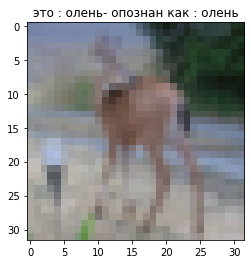

In [24]:
N = 100
y_p=model_2stek.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

В качестве дальнейших шагов улучшения модели можно рассмотреть еще большее увеличение количества эпох, пока метрики позволяют, и добавление дропаут слоев, чтобы предупредить проблему переобучения.

In [25]:
epochs = 50
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
x14 = MaxPooling2D(pool_size=(2, 2))(x13)
x15 = Dropout(0.25)(x14)
first_dense = x15

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
x24 = MaxPooling2D(pool_size=(2, 2))(x23)
x25 = Dropout(0.25)(x24)
second_dense = x25

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense1 = Dense(512, activation='relu')(merge_flat)
merge_dense2 = Dropout(0.5)(merge_dense1)
merge_dense3 = Dense(128, activation='relu')(merge_dense2)
merge_dense4 = Dropout(0.5)(merge_dense3)
merge_class = Dense(10, activation='softmax')(merge_dense4)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

plot_model(model_2stek,'model_2stek.png')


hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
print('Test')
scores = model_2stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/50
782/782 [==============================] - 71s 89ms/step - loss: 2.1152 - accuracy: 0.2135 - val_loss: 1.8529 - val_accuracy: 0.3596
Epoch 2/50
782/782 [==============================] - 69s 88ms/step - loss: 1.8741 - accuracy: 0.3186 - val_loss: 1.6411 - val_accuracy: 0.4206
Epoch 3/50
782/782 [==============================] - 69s 88ms/step - loss: 1.7406 - accuracy: 0.3714 - val_loss: 1.5113 - val_accuracy: 0.4523
Epoch 4/50
782/782 [==============================] - 70s 89ms/step - loss: 1.6548 - accuracy: 0.3998 - val_loss: 1.4268 - val_accuracy: 0.4873
Epoch 5/50
782/782 [==============================] - 69s 89ms/step - loss: 1.5830 - accuracy: 0.4263 - val_loss: 1.3499 - val_accuracy: 0.5135
Epoch 6/50
782/782 [==============================] - 69s 88ms/step - loss: 1.5187 - accuracy: 0.4471 - val_loss: 1.3051 - val_accuracy: 0.5318
Epoch 7/50
782/782 [==============================] - 69s 88ms/step - loss: 1.4684 - accuracy: 0.4745 - val_loss: 1.2543 - val_accuracy: